In [11]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#Reading CSV
dataFrame=pd.read_csv(r"C:\Users\moham\PycharmProjects\Deep Learning\insurance_data.csv")

In [13]:
dataFrame.head()

,age,affordability,have_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


Max Age 62
Min Age 18


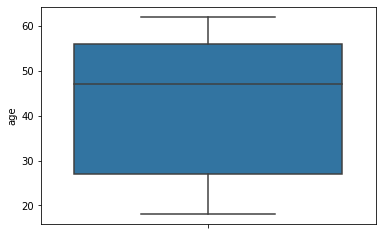

<Figure size 432x288 with 0 Axes>

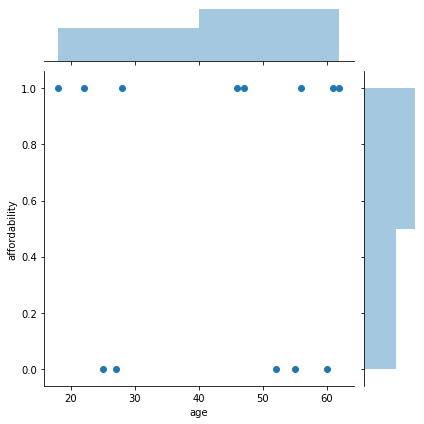

In [14]:
#Plotting 
plt.figure(1)
sns.boxplot(y=dataFrame['age'])
plt.figure(2)
#plt.scatter(x=dataFrame['age'], y=dataFrame['affordability'])
sns.jointplot(x=dataFrame['age'], y=dataFrame['affordability'])
print("Max Age",+np.max(dataFrame['age']))
print("Min Age",+np.min(dataFrame['age']))

In [15]:
#Import package for SkLearn operation train test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(dataFrame[['age','affordability']], dataFrame.have_insurance, test_size=0.2, random_state=10)


In [16]:
#Scalling For the More accurate result
X_train_scaled=X_train.copy()
X_train_scaled['age']=X_train_scaled['age']/100
X_test_scaled=X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100

In [17]:
np.sort(X_train_scaled)

array([[0.  , 0.55],
       [0.62, 1.  ],
       [0.47, 1.  ],
       [0.  , 0.27],
       [0.56, 1.  ],
       [0.18, 1.  ],
       [0.  , 0.25],
       [0.22, 1.  ],
       [0.46, 1.  ],
       [0.61, 1.  ]])

In [19]:
#Building a Sequential Model
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50)

Train on 10 samples
Epoch 1/50
10/10 [==============================] - 0s 39ms/sample - loss: 0.6565 - accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 0s 200us/sample - loss: 0.6561 - accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 0s 200us/sample - loss: 0.6558 - accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 0s 400us/sample - loss: 0.6554 - accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 200us/sample - loss: 0.6550 - accuracy: 0.5000
Epoch 6/50
10/10 [==============================] - 0s 200us/sample - loss: 0.6547 - accuracy: 0.5000
Epoch 7/50
10/10 [==============================] - 0s 100us/sample - loss: 0.6543 - accuracy: 0.5000
Epoch 8/50
10/10 [==============================] - 0s 100us/sample - loss: 0.6540 - accuracy: 0.5000
Epoch 9/50
10/10 [==============================] - 0s 300us/sample - loss: 0.6536 - accuracy: 0.5000
Epoch 10/50
10/10 [==============================] - 0s 300us/s

In [20]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 36ms/sample - loss: 25.6455 - accuracy: 0.3333


[25.645523071289062, 0.33333334]

In [21]:
coef,intercept=model.get_weights()

In [22]:
#Get weight and bias
coef,intercept

(array([[0.95105344],
        [0.9513509 ]], dtype=float32), array([-0.04953126], dtype=float32))